In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import genfromtxt

In [27]:
X = genfromtxt("3PCFiso_FB.dat",delimiter = ',')
puntos = X[:,0]
tiempo = X[:,1]*0.001

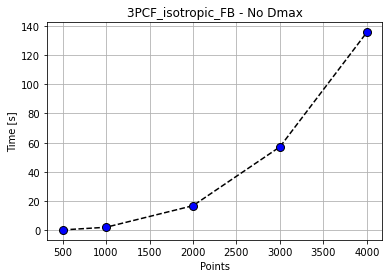

In [28]:
plt.figure()
plt.plot(puntos,tiempo,color = "black",linestyle="dashed",marker = 'o', markerfacecolor = "blue",markersize = 8)
plt.grid()
plt.xlabel("Points")
plt.ylabel("Time [s]")
plt.title("3PCF_isotropic_FB - No Dmax")
plt.savefig("3PCFiso_FB_noDmax.png")
plt.show()